DEMO: Voice with piano - Queen Don't stop me now
The effect of source separation on the chromagram is investigated and discussed in this plot


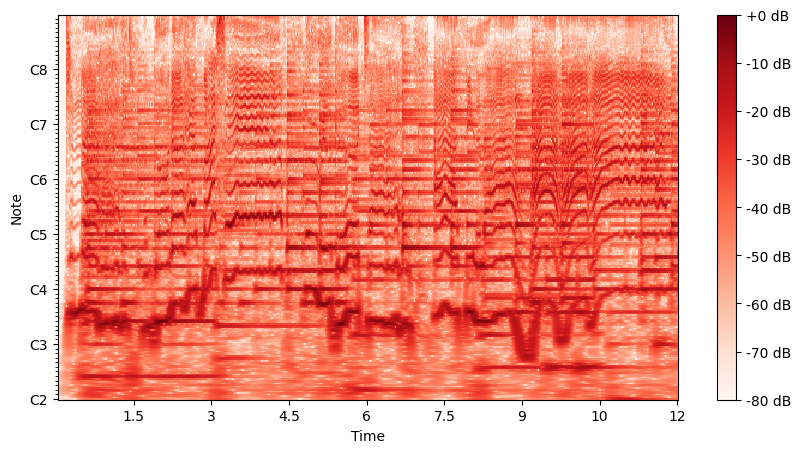

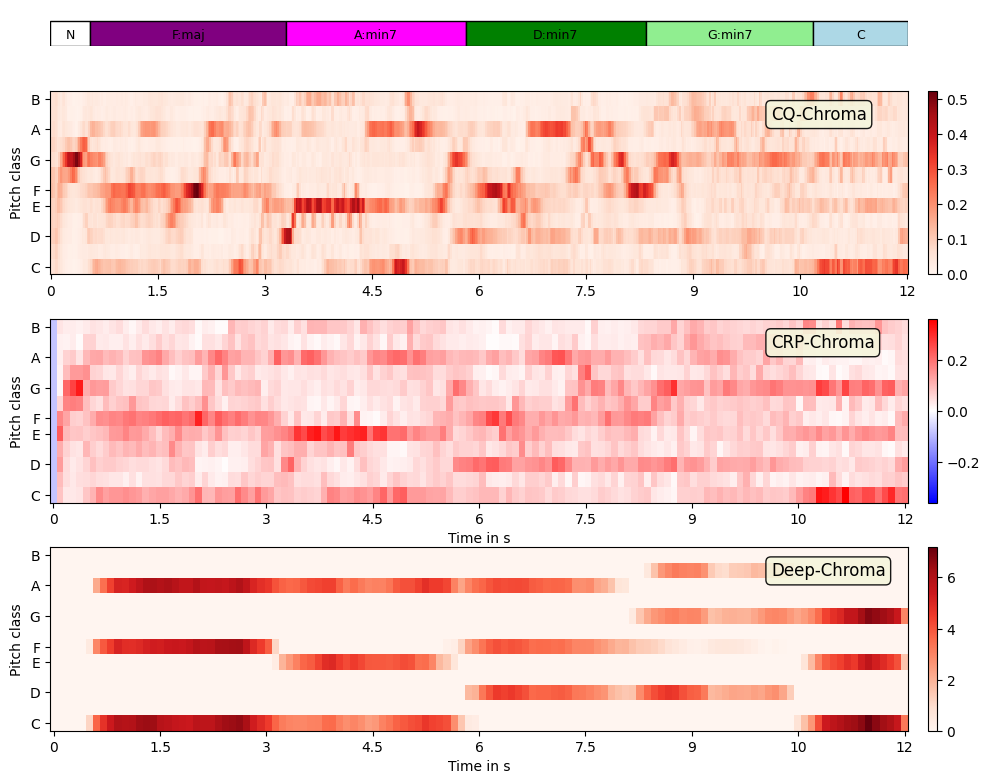

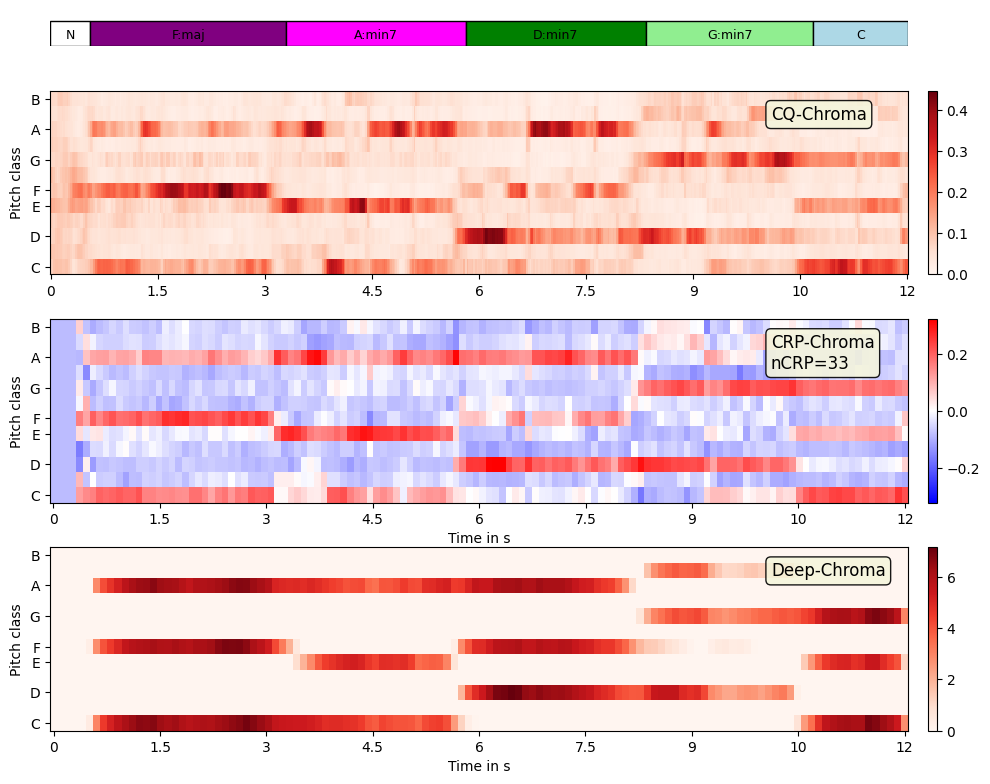

In [3]:
import matplotlib.pyplot as plt
import utilities
import features
import librosa.display
import mirdata
import numpy as np

queendataset = mirdata.initialize("queen","/home/max/ET-TI/Masterarbeit/mirdata/queen")
audiopath = queendataset.track("6").audio_path
harmonic_audiopath = audiopath.rsplit(".flac")[0] + "_harmonic+drums.mp3"
annotationspath = queendataset.track("6").chords_path
_,signal = utilities.loadAudio(audiopath,t_stop=12)
_,signal_harmonic = utilities.loadAudio(harmonic_audiopath,t_stop=12)
gt = utilities.loadAnnotations(annotationspath)
t_cq,cq = features.cqt(signal)

# CQT of mix
fig,ax = plt.subplots(figsize=(10,5))
img=librosa.display.specshow(librosa.amplitude_to_db(cq,ref=np.max),ax=ax,hop_length=2048,cmap="Reds",sr=22050,bins_per_octave=36,x_coords=t_cq,
                         x_axis="time",y_axis="cqt_note",key="F:maj",fmin=librosa.midi_to_hz(36),fmax=librosa.midi_to_hz(36)*(2**7))
fig.colorbar(img,ax=ax,format="%+2.f dB")

# ISOLATED VOCALS
t_cqt_vocals,cqt_chroma_vocals = features.cqtChroma(signal)
t_crp_vocals,crp_chroma_vocals = features.crpChroma(signal,window=True,liftering=True)
t_dcp,deep_chroma = features.deepChroma(signal,5)


fig,((ax0,ax01), (ax1,ax11),(ax2,ax22),(ax3,ax33)) = plt.subplots(4,2,height_ratios=(2,10,10,10),
                                        width_ratios=(10,0.1), figsize=(10,8))
utilities.plotChordAnnotations(ax0,gt,(0,12))
img = utilities.plotChromagram(ax1,t_cqt_vocals,cqt_chroma_vocals,chroma_type="cqt");
ax1.text(0.84, 0.92,"CQ-Chroma", transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax11);

ax1.set_xlabel("")
img = utilities.plotChromagram(ax2,t_crp_vocals,crp_chroma_vocals,chroma_type="crp");
ax2.text(0.84, 0.92,f"CRP-Chroma\nnCRP={nCRP}", transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax22);

img = utilities.plotChromagram(ax3,t_dcp,deep_chroma,chroma_type="cqt")
ax3.text(0.84, 0.92,"Deep-Chroma", transform=ax3.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax33);
fig.tight_layout(h_pad=0.1,w_pad=0.1)
ax01.set_axis_off()

# ISOLATED INSTRUMENTALS
nCRP = 33
t_cqt_vocals,cqt_chroma_vocals = features.cqtChroma(signal_harmonic)
t_crp_vocals,crp_chroma_vocals = features.crpChroma(signal_harmonic,nCRP=33,window=True,liftering=True)
t_dcp,deep_chroma = features.deepChroma(signal_harmonic,5)


fig,((ax0,ax01), (ax1,ax11),(ax2,ax22),(ax3,ax33)) = plt.subplots(4,2,height_ratios=(2,10,10,10),
                                        width_ratios=(10,0.1), figsize=(10,8))
utilities.plotChordAnnotations(ax0,gt,(0,12))
img = utilities.plotChromagram(ax1,t_cqt_vocals,cqt_chroma_vocals,chroma_type="cqt");
ax1.text(0.84, 0.92,"CQ-Chroma", transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax11);

ax1.set_xlabel("")
img = utilities.plotChromagram(ax2,t_crp_vocals,crp_chroma_vocals,chroma_type="crp");
ax2.text(0.84, 0.92,f"CRP-Chroma\nnCRP={nCRP}", transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax22);

img = utilities.plotChromagram(ax3,t_dcp,deep_chroma,chroma_type="cqt")
ax3.text(0.84, 0.92,"Deep-Chroma", transform=ax3.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round',facecolor='beige', alpha=0.9))
fig.colorbar(img,cax=ax33);
fig.tight_layout(h_pad=0.1,w_pad=0.1)
ax01.set_axis_off()